In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
df=pd.read_csv("relationship_comments_18.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,3,8,14,15,16,22,25,27,33,34,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 24063


# General EDA

In [5]:
df.head()

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday
0,False,ccmcg3,1488827331.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,10.0,True,False,relationships,t5_2qjvn,r/relationships,public,NaN
1,False,prolific_hype,1517950771.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,5.0,True,False,relationships,t5_2qjvn,r/relationships,public,NaN
2,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,False,relationships,t5_2qjvn,r/relationships,public,NaN
3,False,Temprament,1365130030.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,79.0,True,False,relationships,t5_2qjvn,r/relationships,public,NaN
4,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,False,relationships,t5_2qjvn,r/relationships,public,NaN


In [6]:
df.tail()

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday
262258,False,Somethoughts44,1473577036.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,2.0,True,False,relationships,t5_2qjvn,r/relationships,public,NaN
262259,False,Redz1990,1462126011.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,1.0,True,False,relationships,t5_2qjvn,r/relationships,public,NaN
262260,False,[deleted],NaN,NaN,NaN,NaN,NaN,NaN,dark,NaN,...,NaN,1.546258e+09,1.0,True,False,relationships,t5_2qjvn,r/relationships,public,NaN
262261,False,Levelfivemage,1518480415.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,1.0,True,False,relationships,t5_2qjvn,r/relationships,public,NaN
262262,False,ShandiAppletini,1535349127.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,12.0,True,False,relationships,t5_2qjvn,r/relationships,public,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262281 entries, 0 to 262262
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   archived                       262273 non-null  object 
 1   author                         262273 non-null  object 
 2   author_created_utc             218106 non-null  object 
 3   author_flair_background_color  0 non-null       float64
 4   author_flair_css_class         10 non-null      float64
 5   author_flair_richtext          218106 non-null  object 
 6   author_flair_template_id       0 non-null       float64
 7   author_flair_text              10 non-null      object 
 8   author_flair_text_color        44177 non-null   object 
 9   author_flair_type              218106 non-null  object 
 10  author_fullname                218106 non-null  object 
 11  author_patreon_flair           218106 non-null  object 
 12  body                           2622

In [8]:
df.isnull().sum() 

archived                              8
author                                8
author_created_utc                44175
author_flair_background_color    262281
author_flair_css_class           262271
author_flair_richtext             44175
author_flair_template_id         262281
author_flair_text                262271
author_flair_text_color          218104
author_flair_type                 44175
author_fullname                   44175
author_patreon_flair              44175
body                                  9
can_gild                             18
can_mod_post                         18
collapsed                            18
collapsed_reason                 258352
controversiality                     18
created_utc                          18
distinguished                    248855
edited                               18
gilded                               18
gildings                             18
id                                   18
is_submitter                         18


In [9]:
df.columns

Index(['archived', 'author', 'author_created_utc',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'body', 'can_gild',
       'can_mod_post', 'collapsed', 'collapsed_reason', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'no_follow', 'parent_id', 'permalink',
       'removal_reason', 'retrieved_on', 'score', 'send_replies', 'stickied',
       'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'author_cakeday'],
      dtype='object')

In [10]:
df.describe()

,author_flair_background_color,author_flair_css_class,author_flair_template_id,controversiality,created_utc,removal_reason,retrieved_on,score
count,0.0,10.000000,0.0,2.622630e+05,2.622630e+05,0.0,2.622530e+05,262253.000000
mean,NaN,0.100000,NaN,5.894192e+04,1.542256e+09,NaN,1.545487e+09,13.879471
std,NaN,0.316228,NaN,9.545202e+06,9.553160e+06,NaN,4.266292e+05,81.305479
min,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,1.544848e+09,-338.000000
25%,NaN,0.000000,NaN,0.000000e+00,1.541657e+09,NaN,1.545125e+09,1.000000
50%,NaN,0.000000,NaN,0.000000e+00,1.542284e+09,NaN,1.545406e+09,2.000000
75%,NaN,0.000000,NaN,0.000000e+00,1.542956e+09,NaN,1.545932e+09,7.000000
max,NaN,1.000000,NaN,1.546226e+09,1.543622e+09,NaN,1.546258e+09,9879.000000


# One Feature EDA

# Controversialty

0.000000e+00    253712
1.000000e+00      8541
1.545156e+09         1
1.545199e+09         1
1.545392e+09         1
1.545957e+09         1
1.545990e+09         1
1.545997e+09         1
1.546094e+09         1
1.546130e+09         1
1.546134e+09         1
1.546226e+09         1
Name: controversiality, dtype: int64


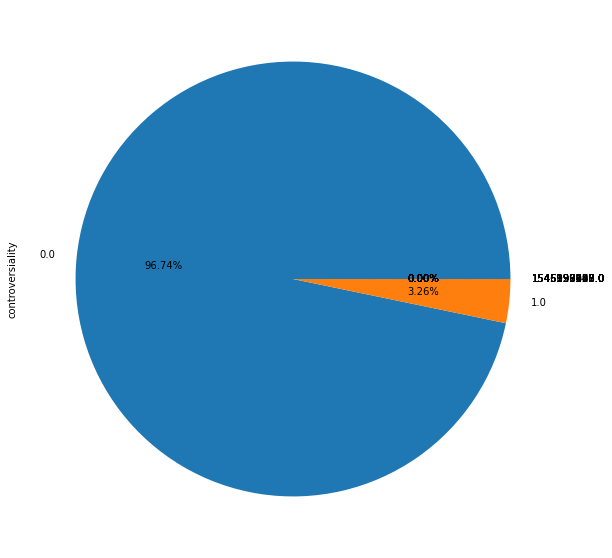

In [12]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [13]:
df[df['controversiality'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday
73931,False,pbblankgirl,1451195874.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83800,False,pbblankgirl,1451195874.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127874,False,pbblankgirl,1451195874.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200647,False,pbblankgirl,1451195874.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You're right to question having to be around her toxic family for the rest of your life.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You're also right to want to spend time with your friends.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You are only 22 years old and about to graduate college. You have your whole life ahead of you. There will be plenty of time to enjoy yourself and find someone who is a better match.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206290,False,pbblankgirl,1451195874.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207376,False,pbblankgirl,1451195874.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225532,False,pbblankgirl,1451195874.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Converting Controversiality values and deleting unimportant rows

In [14]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

0               253712
1                 8541
1545156397.0         1
1545199350.0         1
1545392247.0         1
1545957446.0         1
1545990475.0         1
1545997280.0         1
1546093725.0         1
1546129952.0         1
1546133919.0         1
1546225607.0         1
Name: controversiality, dtype: int64


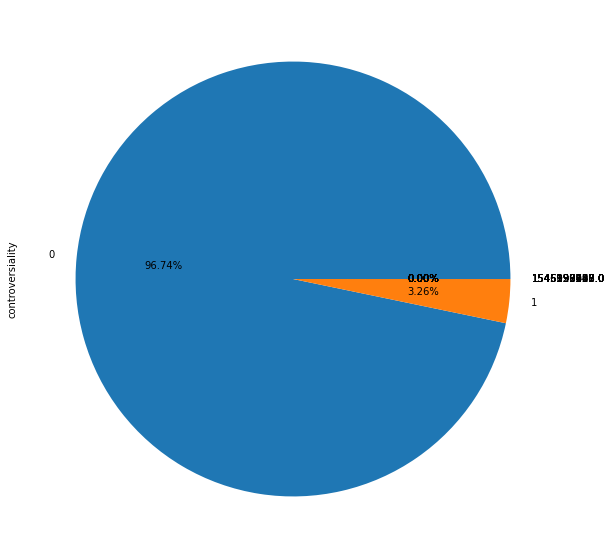

In [15]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Lösche alle zeilen die bei controverse keien richten wert haben und bei Body ein NaN haben

In [19]:
import pandas as pd
import numpy as np  # Um auf NaN-Werte zuzugreifen

# Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Selektiere Zeilen, deren Wert in der Spalte 'controversiality' weder "0" noch "1" ist
# UND Zeilen, bei denen 'body' NaN ist
df_select = df[~df['controversiality'].isin(["0", "1"]) & df['body'].isna()]

# Lösche die ausgewählten Zeilen aus dem ursprünglichen DataFrame 'df'
df = df.drop(df_select.index)


0               253712
1                 8541
1545156397.0         1
1545199350.0         1
1545392247.0         1
1545957446.0         1
1545990475.0         1
1545997280.0         1
1546093725.0         1
1546129952.0         1
1546133919.0         1
1546225607.0         1
Name: controversiality, dtype: int64


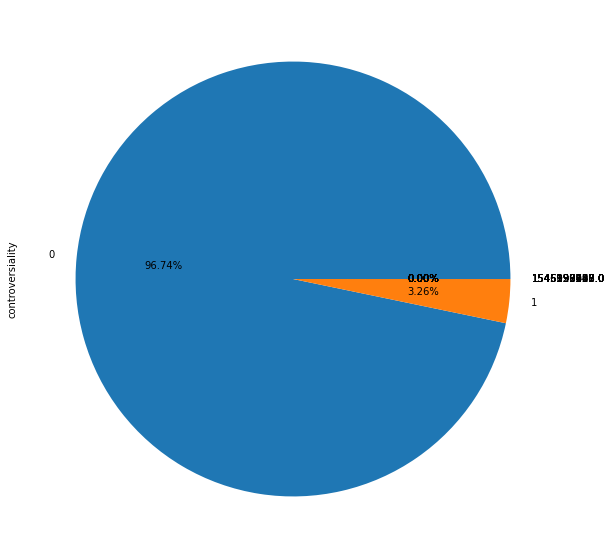

In [20]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [24]:
import pandas as pd
import numpy as np  # Um auf NaN-Werte zuzugreifen

# Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Selektiere Zeilen, deren Wert in der Spalte 'controversiality' weder "0" noch "1" ist
# UND Zeilen, bei denen 'body' NaN ist
df_select = df[~df['controversiality'].isin(["0", "1"]) & df['created_utc'].isna()]

# Lösche die ausgewählten Zeilen aus dem ursprünglichen DataFrame 'df'
df = df.drop(df_select.index)

0               253712
1                 8541
1545156397.0         1
1545199350.0         1
1545392247.0         1
1545957446.0         1
1545990475.0         1
1545997280.0         1
1546093725.0         1
1546129952.0         1
1546133919.0         1
1546225607.0         1
Name: controversiality, dtype: int64


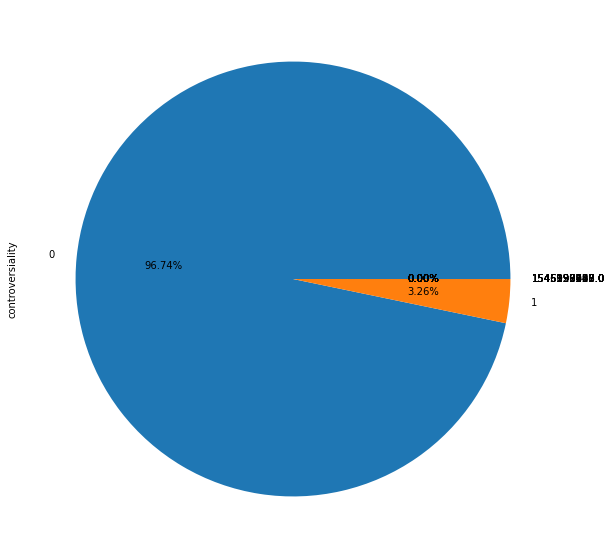

In [25]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [26]:
df["controversiality"].unique()

array(['1', '0', 1545156397.0, 1545199350.0, 1545392247.0, 1545957446.0,
       1545990475.0, 1545997280.0, 1546093725.0, 1546129952.0,
       1546133919.0, 1546225607.0], dtype=object)

In [29]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Selektiere Zeilen, deren Wert in der Spalte 'controversiality' weder "0" noch "1" ist
df[~df['controversiality'].isin(["0", "1"])]


,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday
You gotta assert dominance in these situations.,True,False,False,NaN,0.0,1541727383,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"If you have to *ask your parents* if you can get married, you are not nearly mature nor independent enough to get married.",True,False,False,NaN,0.0,1541820256,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Then ask yourself, would he have lied if you weren't so obsessive and interrogative?",True,False,False,NaN,1.0,1542245880,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Don't let the sunk cost fallacy(in regards to you saying you've invested the past two years into this relationship) keep you tied up for any more of your life.,True,False,False,NaN,0.0,1543012112,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT'S NOT YOUR JOB TO FIX HER,True,False,False,NaN,0.0,1543087583,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New relationships are fickle. This problem will eventually sort itself out. I don't quite understand why you are so involved in your sisters relationship.,True,False,False,NaN,0.0,1543098611,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oh yeah...leave this person in the past. Bad news all around.,True,False,False,NaN,0.0,1543292391,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Right now, you're letting her live in your head rent-free.",True,False,False,NaN,0.0,1543367342,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Two weeks from now, you'll look back and wonder wtf you were doing being with her.",True,False,False,NaN,0.0,1543374957,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"So, change your attitude and stop victimizing yourself. It's *not* a good look, broski.",True,False,False,NaN,0.0,1543554192,NaN,False,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Selektiere Zeilen, deren Wert in der Spalte 'controversiality' weder "0" noch "1" ist
df_select = df[~df['controversiality'].isin(["0", "1"])]

# Lösche die ausgewählten Zeilen aus dem ursprünglichen DataFrame 'df'
df = df.drop(df_select.index)


0    253712
1      8541
Name: controversiality, dtype: int64


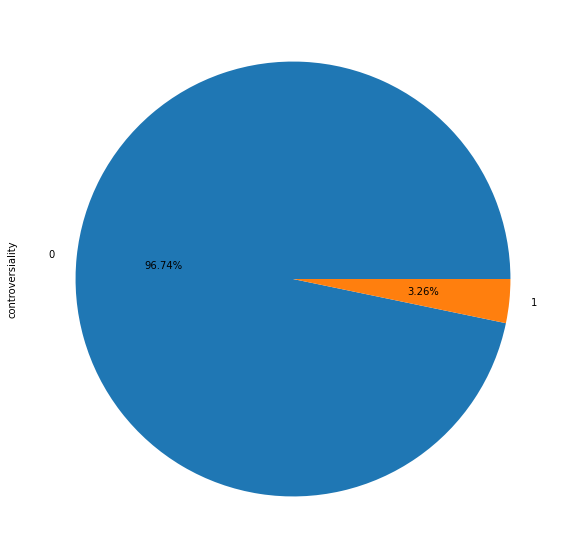

In [31]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [32]:
df["controversiality"].unique()

array(['1', '0'], dtype=object)

# Stickied

False    262253
Name: stickied, dtype: int64


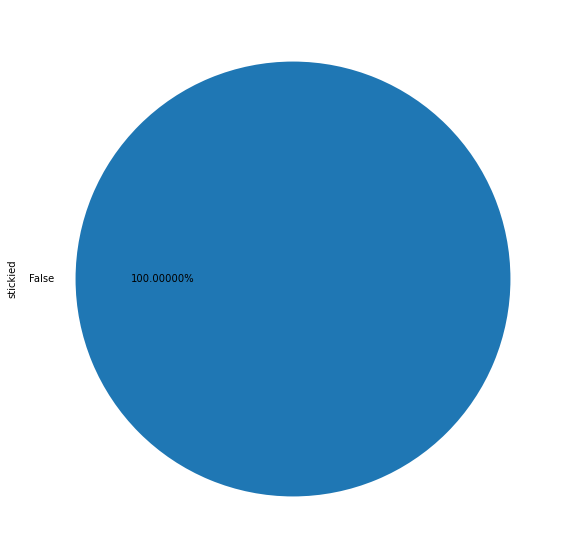

In [33]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [34]:
df["stickied"].unique()

array([False], dtype=object)

In [35]:
df[df['stickied'].isna()] #falsch formatiert

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday


In [36]:
df['stickied'] = df['stickied'].replace(False, "0")

0    262253
Name: stickied, dtype: int64


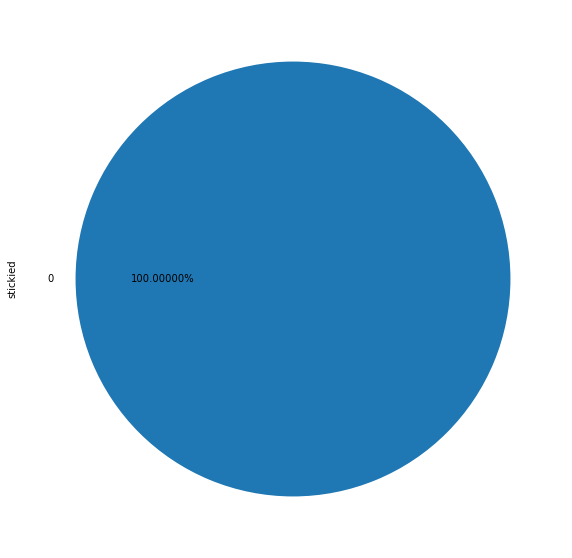

In [37]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [38]:
df["stickied"].unique()

array(['0'], dtype=object)

# link_id

t3_9ve66c    854
t3_a1iooy    845
t3_9tl85s    809
t3_9x3th3    783
t3_9tak1m    766
            ... 
t3_9ww3bb      1
t3_9ww3k5      1
t3_9ww3yt      1
t3_9ww4r5      1
t3_a1xwh3      1
Name: link_id, Length: 26448, dtype: int64


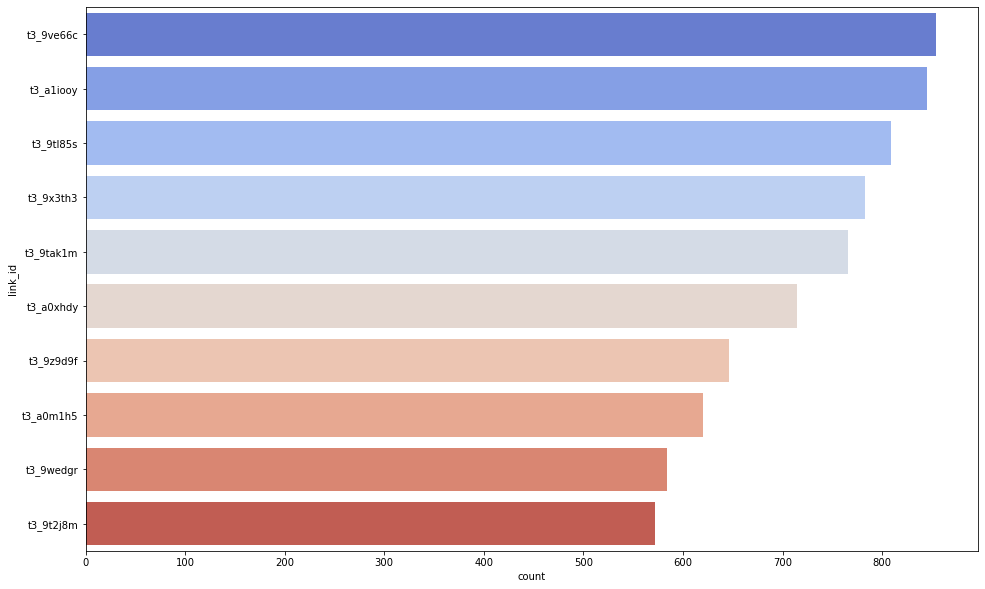

In [39]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [40]:
df[df['link_id'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday


# Subreddit_id

t5_2qjvn    262253
Name: subreddit_id, dtype: int64


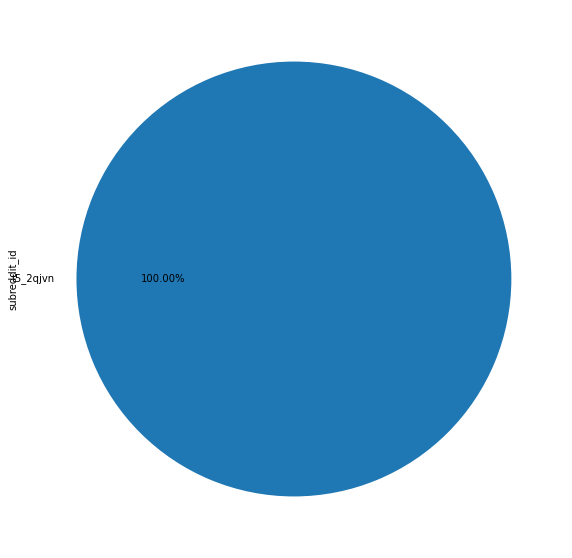

In [41]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

In [42]:
df[df['subreddit_id'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday


# Author

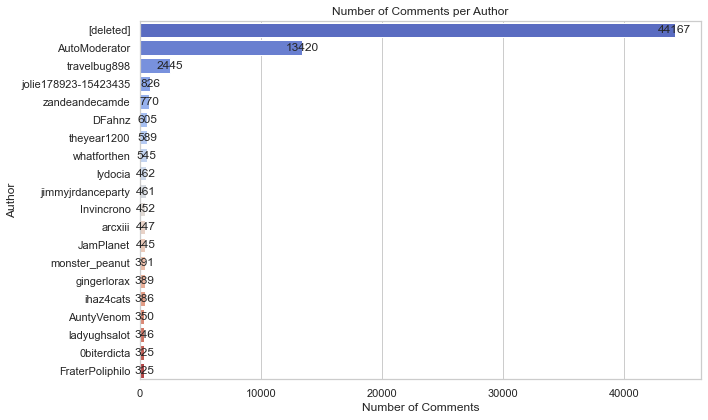

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [44]:
 df[df['author'].str.contains('AutoModerator')]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday
2,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
4,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
29,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
38,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
57,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544849e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262129,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546257e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
262156,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
262178,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
262242,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN


In [45]:
df[df['body'].str.startswith("The above", na=False)]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday
2,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
4,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
29,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
38,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544848e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
57,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.544849e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262129,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546257e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
262156,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
262178,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN
262242,False,AutoModerator,1325741068.0,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,1.546258e+09,1.0,False,0,relationships,t5_2qjvn,r/relationships,public,NaN


# Alle Automoderatoren löschen

In [46]:
df=df.drop(df[df['author'].str.contains('AutoModerator')].index)

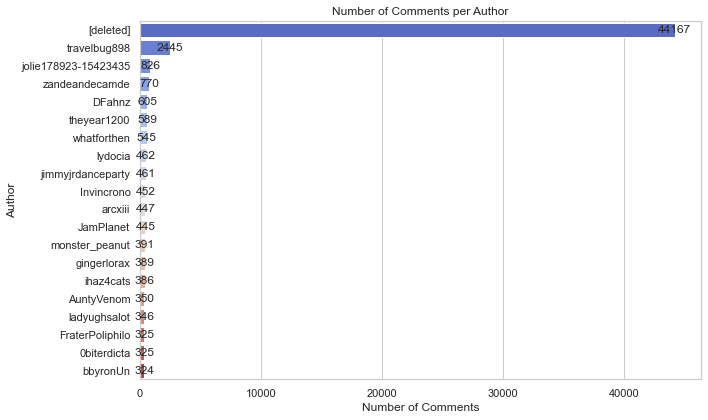

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

# Author flair text

# NA mit 0 füllen

In [48]:
df['author_flair_text'].fillna('0', inplace=True)

0    248833
Name: author_flair_text, dtype: int64


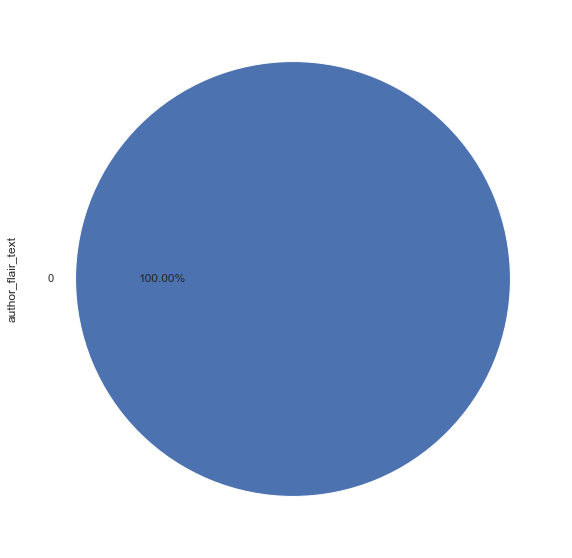

In [49]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationships    248833
Name: subreddit, dtype: int64


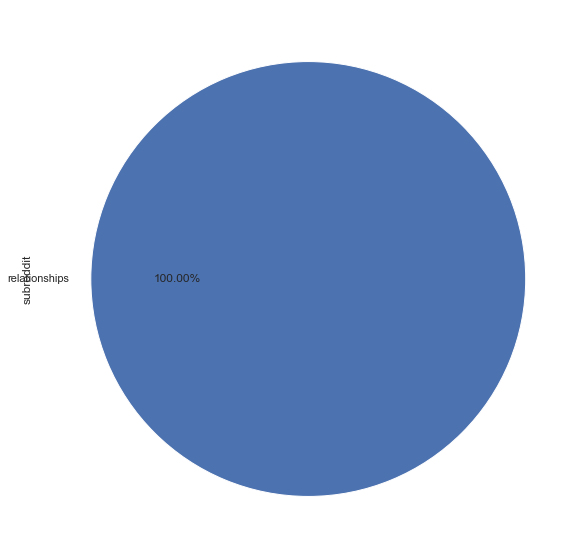

In [50]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [51]:
df[df['subreddit'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday


# Created_utc

In [52]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [53]:
df['created_utc']

0        2018-11-01 00:00:01
1        2018-11-01 00:00:03
3        2018-11-01 00:00:07
5        2018-11-01 00:00:26
6        2018-11-01 00:00:40
                 ...        
262258   2018-11-30 23:58:33
262259   2018-11-30 23:58:37
262260   2018-11-30 23:58:40
262261   2018-11-30 23:59:13
262262   2018-11-30 23:59:24
Name: created_utc, Length: 248833, dtype: datetime64[ns]

# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

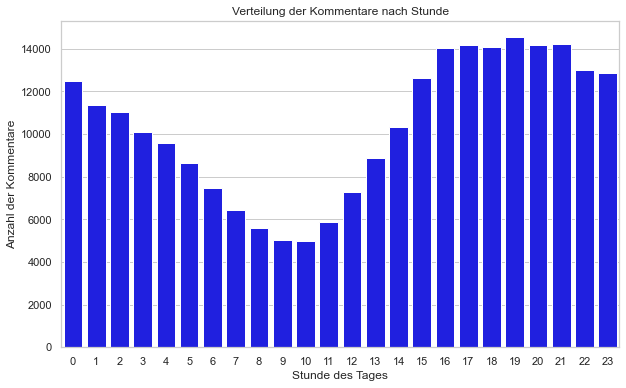

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

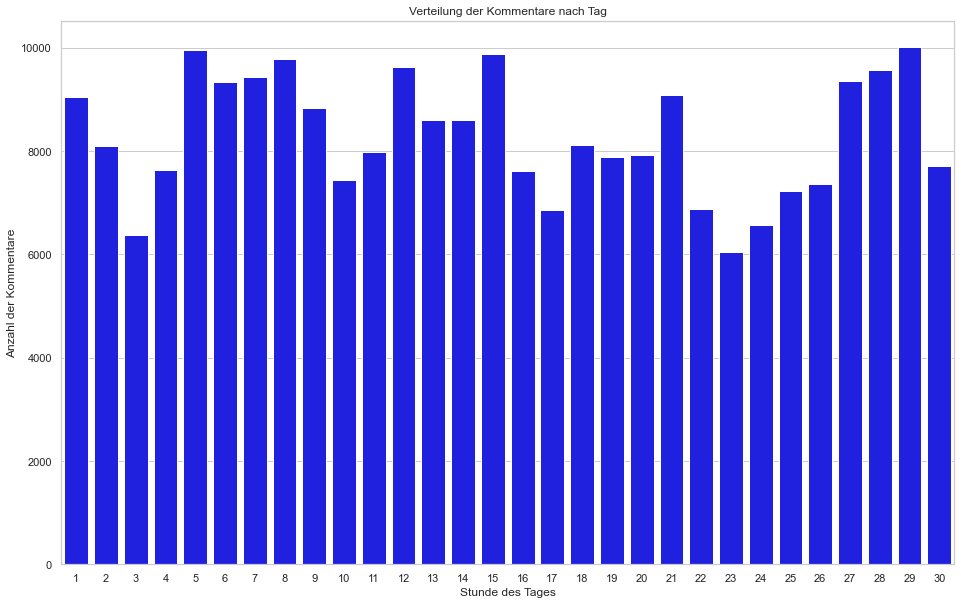

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Year

In [56]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [57]:
 df[pd.isna(df['created_day'])]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday,created_hour,created_day,created_year


# Gilded

In [59]:
df['gilded'] = df['gilded'].replace(0,"0")
df['gilded'] = df['gilded'].replace(1,"1")
df['gilded'] = df['gilded'].replace(2,"2")

0    248810
1        22
2         1
Name: gilded, dtype: int64


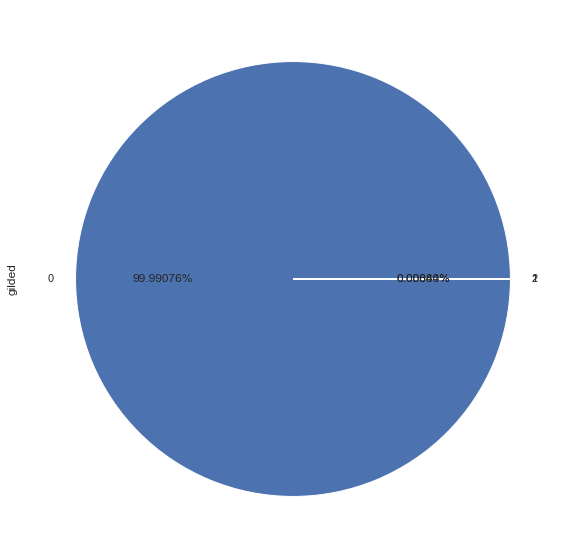

In [61]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["gilded"].value_counts())

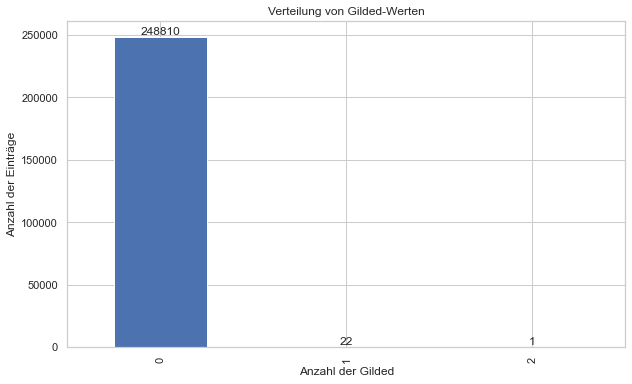

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

In [63]:
df["gilded"].unique()

array(['0', '1', '2'], dtype=object)

# Distinguished

In [64]:
df['distinguished'].fillna('0', inplace=True)

0            248829
moderator         4
Name: distinguished, dtype: int64


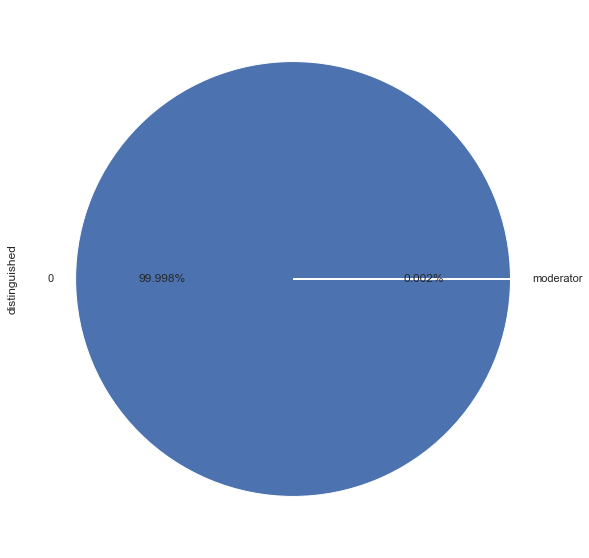

In [65]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [67]:
df["distinguished"].unique()

array(['0', 'moderator'], dtype=object)

# Löschen von automatisch generierten Text

In [69]:
 df[df['distinguished'] == 'moderator']["body"]

96650       Putting your phone number in a post is not wise
141580    Speaking as some one who has banned a lot of p...
172568    Per the rules, you must post your ages in the op.
185264                             You get a hug then, too!
Name: body, dtype: object

# Edited

In [70]:
df["edited"].unique()

array(['False', '1541081668', '1541031132', ..., '1543621915',
       '1543622046', '1543622368'], dtype=object)

In [71]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")

In [72]:
df["edited"].unique()

array(['0', '1'], dtype=object)

0    239098
1      9735
Name: edited, dtype: int64


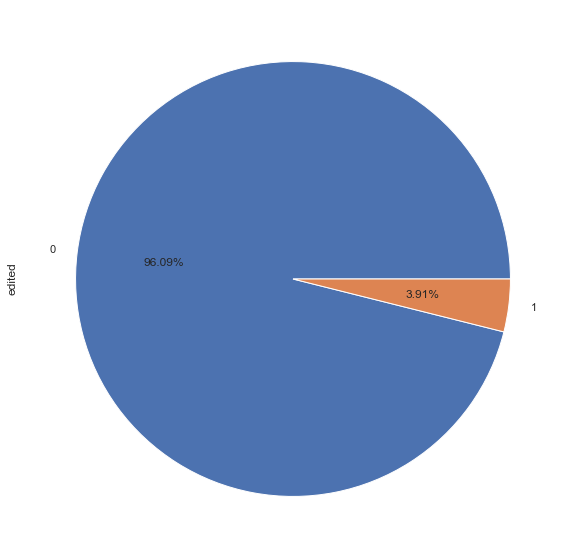

In [73]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [74]:
df[df['edited'].isna()]

,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,author_cakeday,created_hour,created_day,created_year


# Score

In [75]:
df["score"].value_counts()

1.0       68800
2.0       34943
3.0       21640
4.0       10027
5.0        9988
          ...  
1091.0        1
594.0         1
1018.0        1
749.0         1
1022.0        1
Name: score, Length: 1168, dtype: int64

In [76]:
df['score'] = df["score"].astype(int)

In [77]:
df["score"].mean()

14.57411597336366

In [78]:
df.describe()

,author_flair_background_color,author_flair_css_class,author_flair_template_id,removal_reason,retrieved_on,score,created_hour,created_day,created_year
count,0.0,0.0,0.0,0.0,2.488330e+05,248833.000000,248833.000000,248833.000000,248833.0
mean,NaN,NaN,NaN,NaN,1.545486e+09,14.574116,12.604277,15.307118,2018.0
std,NaN,NaN,NaN,NaN,4.266139e+05,83.412660,7.369239,8.702757,0.0
min,NaN,NaN,NaN,NaN,1.544848e+09,-338.000000,0.000000,1.000000,2018.0
25%,NaN,NaN,NaN,NaN,1.545124e+09,1.000000,5.000000,8.000000,2018.0
50%,NaN,NaN,NaN,NaN,1.545404e+09,2.000000,14.000000,15.000000,2018.0
75%,NaN,NaN,NaN,NaN,1.545931e+09,8.000000,19.000000,23.000000,2018.0
max,NaN,NaN,NaN,NaN,1.546258e+09,9879.000000,23.000000,30.000000,2018.0


In [79]:
df.columns

Index(['archived', 'author', 'author_created_utc',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'body', 'can_gild',
       'can_mod_post', 'collapsed', 'collapsed_reason', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'no_follow', 'parent_id', 'permalink',
       'removal_reason', 'retrieved_on', 'score', 'send_replies', 'stickied',
       'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'author_cakeday', 'created_hour', 'created_day',
       'created_year'],
      dtype='object')

In [80]:
#'can_mod_post'
df.isnull().sum() 

archived                              0
author                                0
author_created_utc                44167
author_flair_background_color    248833
author_flair_css_class           248833
author_flair_richtext             44167
author_flair_template_id         248833
author_flair_text                     0
author_flair_text_color          204666
author_flair_type                 44167
author_fullname                   44167
author_patreon_flair              44167
body                                  1
can_gild                              0
can_mod_post                          0
collapsed                             0
collapsed_reason                 244904
controversiality                      0
created_utc                           0
distinguished                         0
edited                                0
gilded                                0
gildings                              0
id                                    0
is_submitter                          0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248833 entries, 0 to 262262
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   archived                       248833 non-null  object        
 1   author                         248833 non-null  object        
 2   author_created_utc             204666 non-null  object        
 3   author_flair_background_color  0 non-null       float64       
 4   author_flair_css_class         0 non-null       float64       
 5   author_flair_richtext          204666 non-null  object        
 6   author_flair_template_id       0 non-null       float64       
 7   author_flair_text              248833 non-null  object        
 8   author_flair_text_color        44167 non-null   object        
 9   author_flair_type              204666 non-null  object        
 10  author_fullname                204666 non-null  object        
 11  autho

# can_mod_post

False    140046
False    108787
Name: can_mod_post, dtype: int64


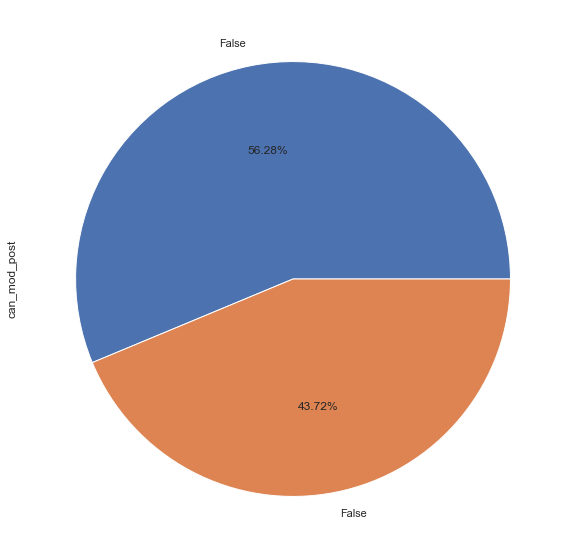

In [82]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['can_mod_post'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['can_mod_post'].value_counts())

# Two Feature Analyses

# Hours vs score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

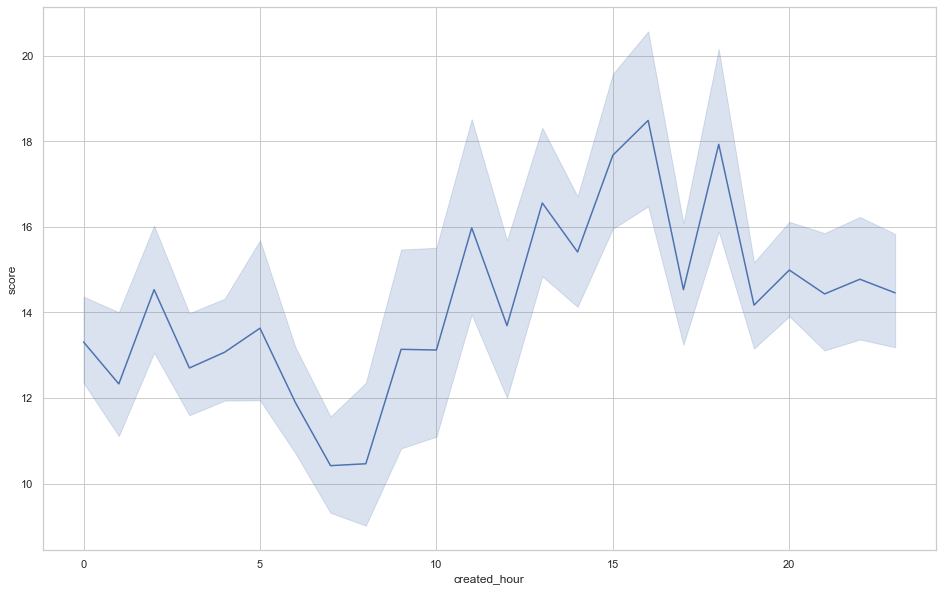

In [83]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Day vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

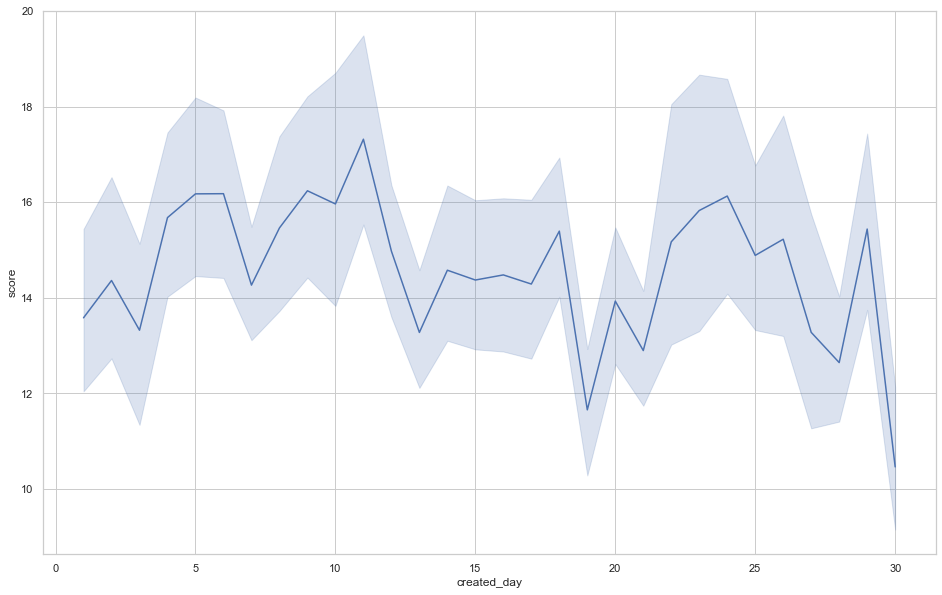

In [84]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

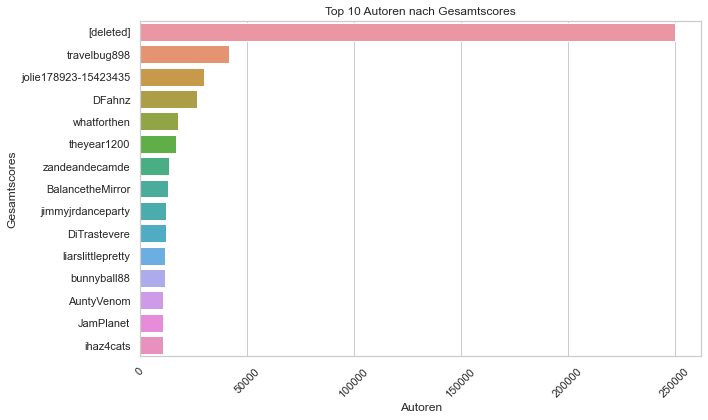

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne Deleted

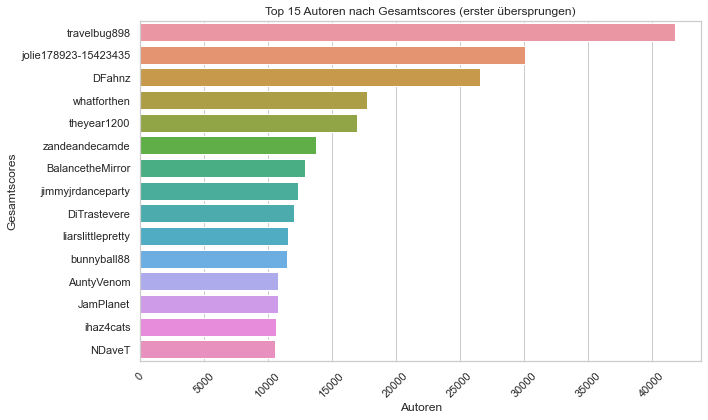

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
df.columns

Index(['archived', 'author', 'author_created_utc',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'body', 'can_gild',
       'can_mod_post', 'collapsed', 'collapsed_reason', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'no_follow', 'parent_id', 'permalink',
       'removal_reason', 'retrieved_on', 'score', 'send_replies', 'stickied',
       'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'author_cakeday', 'created_hour', 'created_day',
       'created_year'],
      dtype='object')

# Column removing

In [90]:
df=df.drop(["archived","author_created_utc","author_flair_richtext","author_flair_template_id","author_flair_text_color","author_flair_type","author_fullname","author_patreon_flair","can_gild","gildings","is_submitter","no_follow","subreddit_name_prefixed","author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","permalink"], axis = 1)

In [92]:
df=df.drop(["author_flair_background_color","author_flair_text","can_mod_post","collapsed","collapsed_reason","removal_reason","send_replies"], axis = 1)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248833 entries, 0 to 262262
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   author            248833 non-null  object        
 1   body              248832 non-null  object        
 2   controversiality  248833 non-null  object        
 3   created_utc       248833 non-null  datetime64[ns]
 4   distinguished     248833 non-null  object        
 5   edited            248833 non-null  object        
 6   gilded            248833 non-null  object        
 7   id                248833 non-null  object        
 8   link_id           248833 non-null  object        
 9   parent_id         248833 non-null  object        
 10  score             248833 non-null  int64         
 11  stickied          248833 non-null  object        
 12  created_hour      248833 non-null  int64         
 13  created_day       248833 non-null  int64         
 14  created_y

# Row Deleting

# Delete all comments that have a NA

In [94]:
df[pd.isna(df['body'])]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
92196,wigglyrhyme,NaN,0,2018-11-11 04:14:25,0,1,0,e9gpk33,t3_9ubbsb,t1_e931y8g,2,0,4,11,2018


In [95]:
df = df.dropna(subset=['body'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248832 entries, 0 to 262262
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   author            248832 non-null  object        
 1   body              248832 non-null  object        
 2   controversiality  248832 non-null  object        
 3   created_utc       248832 non-null  datetime64[ns]
 4   distinguished     248832 non-null  object        
 5   edited            248832 non-null  object        
 6   gilded            248832 non-null  object        
 7   id                248832 non-null  object        
 8   link_id           248832 non-null  object        
 9   parent_id         248832 non-null  object        
 10  score             248832 non-null  int64         
 11  stickied          248832 non-null  object        
 12  created_hour      248832 non-null  int64         
 13  created_day       248832 non-null  int64         
 14  created_y

In [97]:
df.isnull().sum() 

author              0
body                0
controversiality    0
created_utc         0
distinguished       0
edited              0
gilded              0
id                  0
link_id             0
parent_id           0
score               0
stickied            0
created_hour        0
created_day         0
created_year        0
dtype: int64

# Body analyses and Pre processing

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    24063
[deleted]                                                                                                                                                                                                                                                                                                                                                                                                            

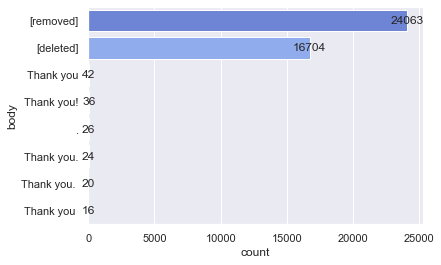

In [98]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben removed comments mehr likes

In [100]:
filtered_df=df[df['body'] == '[removed]']

In [101]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,24063.000000,24063.00000,24063.000000,24063.0
mean,3.342019,12.10593,15.154012,2018.0
std,22.808574,7.46450,8.532354,0.0
min,-338.000000,0.00000,1.000000,2018.0
25%,1.000000,5.00000,8.000000,2018.0
50%,1.000000,14.00000,15.000000,2018.0
75%,2.000000,19.00000,22.000000,2018.0
max,1062.000000,23.00000,30.000000,2018.0


Text(0.5, 1.0, 'Histogramm der Scores')

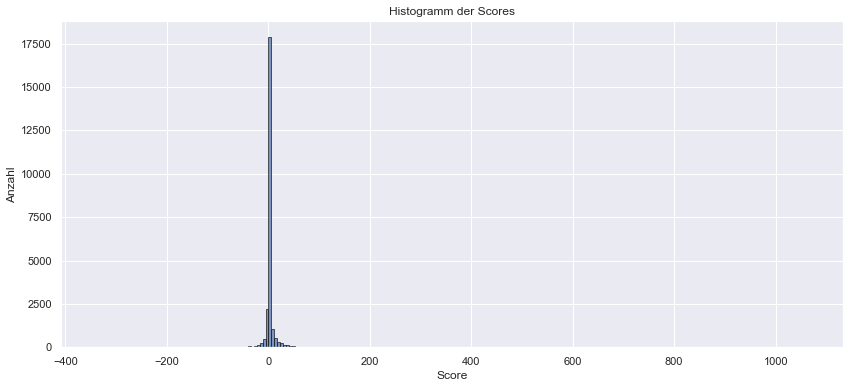

In [102]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

Removed Kommentare Löschen

In [104]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    16704
Thank you                                                                                                                                                                                                                                                                                                                                                                                                            

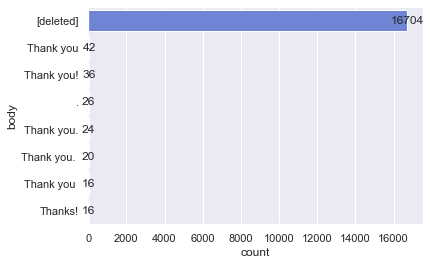

In [105]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben deleted comments mehr likes

In [106]:
filtered_df_del=df[df['body'] == '[deleted]']

In [107]:
filtered_df_del

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
46,[deleted],[deleted],0,2018-11-01 00:05:31,0,0,0,e8tku0m,t3_9t44bq,t3_9t44bq,0,0,0,1,2018
48,[deleted],[deleted],0,2018-11-01 00:05:57,0,0,0,e8tkuxr,t3_9t33xd,t3_9t33xd,8,0,0,1,2018
61,[deleted],[deleted],0,2018-11-01 00:07:45,0,0,0,e8tkyq0,t3_9sw3qe,t1_e8sstdq,1,0,0,1,2018
67,[deleted],[deleted],0,2018-11-01 00:08:23,0,0,0,e8tl03r,t3_9szz4k,t1_e8t6mce,0,0,0,1,2018
80,[deleted],[deleted],0,2018-11-01 00:09:36,0,0,0,e8tl2ph,t3_9t4fr4,t3_9t4fr4,2,0,0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262234,[deleted],[deleted],1,2018-11-30 23:55:20,0,0,0,eatlsga,t3_a1xuu2,t3_a1xuu2,-3,0,23,30,2018
262238,[deleted],[deleted],0,2018-11-30 23:55:40,0,0,0,eatlt7y,t3_a1xvi7,t3_a1xvi7,-2,0,23,30,2018
262247,[deleted],[deleted],0,2018-11-30 23:56:49,0,0,0,eatlvwu,t3_a1thv7,t1_eatldd6,1,0,23,30,2018
262254,[deleted],[deleted],0,2018-11-30 23:58:07,0,0,0,eatlyu4,t3_a1xscd,t3_a1xscd,-1,0,23,30,2018


In [108]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,16704.000000,16704.000000,16704.000000,16704.0
mean,7.833812,12.501497,14.689895,2018.0
std,54.409253,7.240541,8.687617,0.0
min,-123.000000,0.000000,1.000000,2018.0
25%,1.000000,5.000000,7.000000,2018.0
50%,1.000000,14.000000,14.000000,2018.0
75%,3.000000,19.000000,22.000000,2018.0
max,3475.000000,23.000000,30.000000,2018.0


In [109]:
len(filtered_df_del)

16704

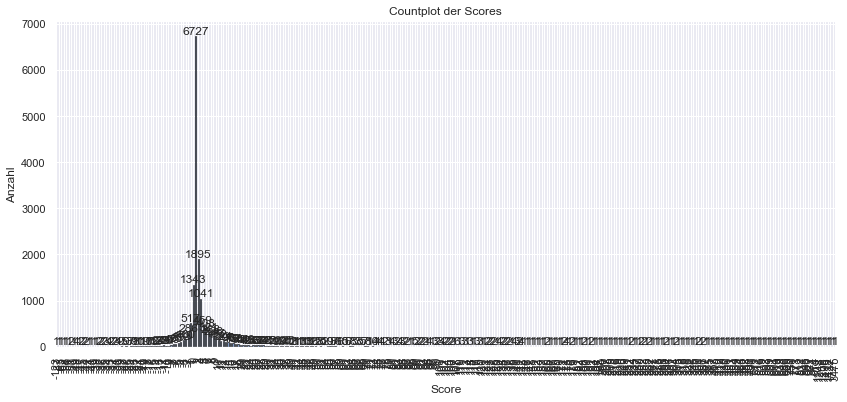

In [110]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')

# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Kommentare die Deleted wurden löschen

In [111]:
df = df[df['body'] != '[deleted]']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    42
Thank you!                                                                                                                                                                                                                                                                                                                                                                                                              

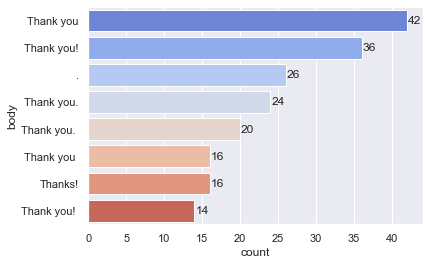

In [112]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [113]:
df = df[df['body'] != '.']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    42
Thank you!                                                                                                                                                                                                                                                                                                                                                                                                              

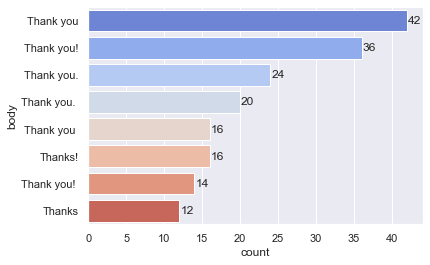

In [114]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Http und redditnames removen

# Löschen aller Authoren die AutoModerator sind

In [115]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

# Http und Redditnames remoen

In [116]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
15194,dinosaur_train,/r/Legaladvice,0,2018-11-02 18:04:06,0,0,0,e8xczf5,t3_9tl2j3,t3_9tl2j3,1,0,18,2,2018
15228,dinosaur_train,/r/legaladviceuk,0,2018-11-02 18:08:00,0,0,0,e8xdadr,t3_9tmihd,t3_9tmihd,1,0,18,2,2018
184499,dinosaur_train,/r/parenting,0,2018-11-21 18:16:49,0,0,0,ea6i6u7,t3_9z5m5k,t3_9z5m5k,1,0,18,21,2018
186560,dinosaur_train,/r/nonmonogamy,0,2018-11-21 21:50:34,0,0,0,ea6y8ov,t3_9z7os4,t3_9z7os4,1,0,21,21,2018
186931,dinosaur_train,/r/justnofamily,0,2018-11-21 22:47:27,0,0,0,ea725vp,t3_9z87la,t3_9z87la,1,0,22,21,2018
191146,dinosaur_train,/r/justnomil,0,2018-11-22 13:31:06,0,0,0,ea8d8hv,t3_9ze1nu,t3_9ze1nu,1,0,13,22,2018
212687,dinosaur_train,/r/abortion,0,2018-11-25 15:33:59,0,0,0,eafpi6v,t3_a09cjy,t3_a09cjy,1,0,15,25,2018
218661,dinosaur_train,/r/deadbedrooms,0,2018-11-26 11:02:04,0,0,0,eahuxqv,t3_a0hwoz,t3_a0hwoz,1,0,11,26,2018
221814,dinosaur_train,/r/legaladvice,0,2018-11-26 20:11:37,0,0,0,eaivbkn,t3_a0mzjq,t3_a0mzjq,2,0,20,26,2018
224664,dinosaur_train,/r/sex,0,2018-11-27 02:12:35,0,0,0,eajlsv8,t3_a0q96t,t3_a0q96t,1,0,2,27,2018


In [117]:
df = df.drop(selected_sub_men.index)

In [118]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
138191,prettysquigglynoodle,r/unexpectedhogwarts,0,2018-11-16 02:16:29,0,0,0,e9sgnqu,t3_9xdp92,t1_e9s62fj,21,0,2,16,2018
138643,wecsam,r/unexpectedhogwarts,0,2018-11-16 03:38:07,0,0,0,e9slvzz,t3_9xdp92,t1_e9s710i,35,0,3,16,2018
139122,illbitterwit,r/unexpectedhogwarts,0,2018-11-16 05:26:11,0,0,0,e9ss2rh,t3_9xdp92,t1_e9s62fj,2,0,5,16,2018
204290,luciesssss,r/raisedbynarcassists,0,2018-11-24 13:10:25,0,0,0,eacvhjp,t3_9zvuuf,t3_9zvuuf,2,0,13,24,2018
222698,liz-to-the-e-bitches,r/asianparentstories,0,2018-11-26 21:50:36,0,0,0,eaj3jl8,t3_a0ml57,t1_eaiusu7,1,0,21,26,2018
224459,no-definitely-not,r/restofthefuckingowl,0,2018-11-27 01:46:17,0,0,0,eajk0gn,t3_a0oi3q,t1_eaj84dx,8,0,1,27,2018


In [119]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [120]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [121]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [124]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
76395,azzamean,https://www.reddit.com/r/relationships/comment...,0,2018-11-09 09:48:15,0,0,0,e9clc0r,t3_9vj2d4,t3_9vj2d4,5,0,9,9,2018
203857,elricofgrans,https://www.reddit.com/r/offmychest/comments/6...,0,2018-11-24 11:06:47,0,0,0,eacqqb5,t3_9zrlyb,t1_eacm6we,5,0,11,24,2018
231702,browneyesandlashes,https://www.reddit.com/r/relationships/comment...,0,2018-11-27 20:58:39,0,0,0,ealh754,t3_a0wifw,t1_eakyz90,2,0,20,27,2018
235192,browneyesandlashes,https://www.reddit.com/r/relationships/comment...,0,2018-11-28 04:11:51,0,0,0,eambkal,t3_a0zv9x,t1_eam7ybh,2,0,4,28,2018
247534,zandeandecamde,https://www.reddit.com/r/relationships/comment...,0,2018-11-29 12:37:10,0,0,0,eapmrv0,t3_a1gveq,t3_a1gveq,1,0,12,29,2018


In [125]:
df.drop(url_only_rows.index, inplace=True)

# Delete Bots

In [126]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows 

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [127]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Lösche Zeilen, in denen die Spalte 'body' mit 'Helper bot' beginnt
df = df[~df['body'].str.startswith('Helper bot')]

In [128]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_87077/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
24574,lilacwishbone,Sounds like you're being kinda controlling and...,0,2018-11-03 23:23:47,0,0,0,e903bgu,t3_9tyktl,t3_9tyktl,8,0,23,3,2018
35385,the-unhinged-one,I am responding before I read anyone else’s re...,0,2018-11-05 05:31:41,0,0,0,e92xpl8,t3_9u87dh,t3_9u87dh,0,0,5,5,2018
43556,dc4m,Probably a bot farming karma,0,2018-11-06 00:22:49,0,0,0,e94o4wv,t3_9uhbjc,t1_e94kfwn,11,0,0,6,2018
83725,ApostateX,You ever wish this subreddit had a bot for que...,0,2018-11-10 03:14:24,0,0,0,e9efi6o,t3_9vqonc,t1_e9edpta,11,0,3,10,2018
116575,_whatbot_,#Dude..... dude... duuuuude\n\n^^*bleep* ^^*bl...,0,2018-11-13 21:27:11,0,0,0,e9n40o5,t3_9wt6s4,t1_e9n3w4p,1,0,21,13,2018
136219,ed_lv,If you want your relationship with your gf to ...,0,2018-11-15 21:53:24,0,0,0,e9rx4z6,t3_9xfogw,t3_9xfogw,8,0,21,15,2018
136853,ahmadissa162,"Thats the thing, she doesn’t like talking abt ...",0,2018-11-15 23:21:51,0,0,0,e9s49m7,t3_9xgb87,t1_e9s3vyb,1,0,23,15,2018
141127,pickelrick_,They suck you in because they don't want you b...,0,2018-11-16 13:57:06,0,0,0,e9tc3kj,t3_9xl7yj,t1_e9t7b9f,2,0,13,16,2018
164590,gamasco,Thanks for sharing your opinion. Hopefully you...,0,2018-11-19 12:02:50,0,0,0,ea11my6,t3_9yg2ur,t1_ea11m1m,3,0,12,19,2018
177393,goodboihunting,"There is no excuse for poor behavior, but ther...",0,2018-11-20 22:41:39,0,0,0,ea4qto6,t3_9yucv4,t3_9yucv4,-2,0,22,20,2018


In [136]:
df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)].iloc[4]

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_87077/3857099494.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)].iloc[4]


author                                                      _whatbot_
body                #Dude..... dude... duuuuude\n\n^^*bleep* ^^*bl...
controversiality                                                    0
created_utc                                       2018-11-13 21:27:11
distinguished                                                       0
edited                                                              0
gilded                                                              0
id                                                            e9n40o5
link_id                                                     t3_9wt6s4
parent_id                                                  t1_e9n3w4p
score                                                               1
stickied                                                            0
created_hour                                                       21
created_day                                                        13
created_year        

In [137]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Filtere Zeilen, die das Kriterium erfüllen
filtered_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)].iloc[4]

# Index der zu löschenden Zeile
index_to_drop = filtered_rows.name

# Lösche die Zeile aus dem DataFrame
df = df.drop(index_to_drop)

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_87077/349831521.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  filtered_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)].iloc[4]


In [140]:
df_bot=pd.read_csv("bot_names.csv")

In [141]:
df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [142]:
df_check_bot=df.filter(items = mask[mask].index, axis=0)

In [143]:
df_check_bot

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
10,lonefaust,How do you know that the dad got OP the phone?...,0,2018-11-01 00:01:14,0,0,0,e8tkku0,t3_9t2fkq,t1_e8tegg0,11,0,0,1,2018
35,double-dog-doctor,Right? I don't want a friends and family disco...,0,2018-11-01 00:04:12,0,0,0,e8tkr7d,t3_9t2j8m,t1_e8tirl1,52,0,0,1,2018
70,TROPtastic,"I agree, I think there's far worse things that...",0,2018-11-01 00:08:50,0,0,0,e8tl12a,t3_9t3kn6,t1_e8tknf7,41,0,0,1,2018
113,fightmaxmaster,"That's not a prank, that's a lie. A prank shou...",0,2018-11-01 00:13:27,0,0,0,e8tlawp,t3_9t4g1e,t3_9t4g1e,9,0,0,1,2018
128,TROPtastic,I feel like this comment would fit on far too ...,0,2018-11-01 00:15:27,0,0,0,e8tlf4p,t3_9t1tez,t1_e8ticwz,28,0,0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261879,cheertina,You dumped her for your family. Nobody cares ...,0,2018-11-30 22:49:00,0,0,0,eathbzh,t3_a1x5np,t3_a1x5np,17,0,22,30,2018
261901,cheertina,What? You're broken up. You don't get a say in...,0,2018-11-30 22:52:46,0,0,0,eathlgm,t3_a1x5np,t1_eathf4a,20,0,22,30,2018
261951,cheertina,So what? She's different than you. What are ...,0,2018-11-30 23:03:10,0,0,0,eatibr6,t3_a1x5np,t1_eathr85,13,0,23,30,2018
262038,cheertina,You should move on. Find someone else. Stop w...,0,2018-11-30 23:17:59,0,0,0,eatjc3e,t3_a1x5np,t1_eatik8e,7,0,23,30,2018


In [146]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
23957,bot_bot_bot,&gt; My brother told my boyfriend he was just ...,0,2018-11-03 20:32:51,0,0,0,e8ztg2p,t3_9tv3gs,t3_9tv3gs,1,0,20,3,2018
36122,notarobot4932,While it might be reasonable to ask her not to...,0,2018-11-05 08:12:56,0,0,0,e932v24,t3_9u9ew4,t1_e92nm2k,14,0,8,5,2018
38268,princesspeachbottom,You didn’t do anything wrong. Just give him ti...,0,2018-11-05 15:43:13,0,0,0,e93lio0,t3_9ueitg,t3_9ueitg,2,0,15,5,2018
51701,ordinarybots,[NEXT JOKE ORIGIN](https://www.reddit.com/r/Ch...,0,2018-11-06 21:25:42,0,0,0,e96o0zo,t3_9usjdz,t1_e96o0oo,1,0,21,6,2018
69179,notarobot4932,Still doesn't excuse asking the boyfriend to b...,1,2018-11-08 17:05:41,0,0,0,e9auv98,t3_9vakxg,t1_e9akpyx,-1,0,17,8,2018
76069,bot_bot_bot,These people are mobbing him. They are unreaso...,1,2018-11-09 07:53:14,0,0,0,e9chgd7,t3_9ve66c,t1_e9bxuvf,0,0,7,9,2018
76196,bot_bot_bot,"Yes they can, they totally can. Google mobbing...",0,2018-11-09 08:33:13,0,0,0,e9cit9j,t3_9ve66c,t1_e9bnm6g,2,0,8,9,2018
76200,bot_bot_bot,They don't like him. It's just personal.,0,2018-11-09 08:33:56,0,0,0,e9ciu5z,t3_9ve66c,t1_e9bxaj1,3,0,8,9,2018
76649,bot_bot_bot,Here's my personal experience of how much wors...,0,2018-11-09 11:10:41,0,0,0,e9co98s,t3_9ve66c,t1_e9cno6s,1,0,11,9,2018
76959,bot_bot_bot,I agree. I think we've crossed wires. I was sp...,0,2018-11-09 12:38:13,0,0,0,e9cs09p,t3_9ve66c,t1_e9coxbz,1,0,12,9,2018


In [148]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame mit dem Namen 'df'
# Wenn nicht, lade deine Daten zuerst in ein DataFrame

# Finde Zeilen, in denen der Wert in der Spalte 'author' gleich 'ordinarybots' ist
ordinarybots_rows = df[df['author'] == 'ordinarybots']

# Lösche die Zeilen aus dem DataFrame
df = df.drop(ordinarybots_rows.index)



# NLP Deleting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv("relationship_18_comments_EDA_clean.csv",sep=";")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208010 entries, 0 to 208009
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            208010 non-null  object
 1   body              208010 non-null  object
 2   controversiality  208010 non-null  int64 
 3   created_utc       208010 non-null  object
 4   distinguished     208010 non-null  object
 5   edited            208010 non-null  int64 
 6   gilded            208010 non-null  int64 
 7   id                208010 non-null  object
 8   link_id           208010 non-null  object
 9   parent_id         208010 non-null  object
 10  score             208010 non-null  int64 
 11  stickied          208010 non-null  int64 
 12  created_hour      208010 non-null  int64 
 13  created_day       208010 non-null  int64 
 14  created_year      208010 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 23.8+ MB


In [13]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [14]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0       Wow... it sucks how ungrateful children are. M...   
1       She isn't your girlfriend bro...she is cheatin...   
2       That's usually just gas. /s He probably thinks...   
3       Then you don't date that person to begin with,...   
4       This is a pretty adorable post.  Are my worrie...   
...                                                   ...   
208005  I wouldn’t say this is a relationship deal bre...   
208006  Talk to your boyfriend. Because honestly what ...   
208007  I’m not asking to be thanked for showing up to...   
208008  If you want a title like girlfriend or a defin...   
208009  My boyfriend did this for awhile.. I think he ...   

                                               clean_text  
0       Wow ... it sucks how ungrateful children are ....  
1       She isn t your girlfriend bro ... she is cheat...  
2       That s usually just gas . s He probably thinks...  
3       Then you don t date

In [15]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [16]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
10483,BalancetheMirror,https://www.google.com/amp/s/amp.reddit.com/r/...,0,2018-11-02 13:44:46,0,0,0,e8wtowu,t3_9tikj9,t1_e8wscvd,1,0,13,2,2018,,0
16864,ashpens,r/justnomil r/justnoso r/justnofamily,0,2018-11-03 13:40:06,0,0,0,e8z37kz,t3_9tsbl3,t3_9tsbl3,3,0,13,3,2018,,0
18423,LucyintheSky0018,/r/raisedbynarcissists /r/justnomil,0,2018-11-03 18:35:45,0,0,0,e8zm0aj,t3_9tvrrl,t3_9tvrrl,1,0,18,3,2018,,0
20637,vincentbec,—,0,2018-11-04 05:22:22,0,0,0,e90oco9,t3_9u0r6q,t1_e90mqx7,17,0,5,4,2018,,0
23404,insAnnA_ty,":,)",0,2018-11-04 17:54:28,0,0,0,e91l91f,t3_9u3utt,t1_e91k23t,3,0,17,4,2018,,0
61347,Fluffbrain,,0,2018-11-09 14:08:18,0,1,0,e9cx3ik,t3_9vkjh8,t3_9vkjh8,93,0,14,9,2018,,0
63086,AltruisticOutcome,¿?,0,2018-11-09 18:37:13,0,0,0,e9dgroy,t3_9vmvrx,t1_e9dg7ly,-5,0,18,9,2018,,0
70579,LucyintheSky0018,/r/raisedbynarcissists /r/justnomil,0,2018-11-10 21:20:20,0,0,0,e9fyu7y,t3_9vxho6,t3_9vxho6,2,0,21,10,2018,,0
76186,33saywhat33,r/survivinginfidelity,0,2018-11-11 17:44:08,0,0,0,e9hso3c,t3_9w5hem,t3_9w5hem,30,0,17,11,2018,,0
89020,LucyintheSky0018,/r/justnomil /r/raisedbynarcissists,0,2018-11-13 15:10:49,0,0,0,e9mbxkr,t3_9wof4q,t3_9wof4q,21,0,15,13,2018,,0


In [17]:
df = df[df['comment_len'] != 0]

# Final EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207981 entries, 0 to 208009
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            207981 non-null  object
 1   body              207981 non-null  object
 2   controversiality  207981 non-null  int64 
 3   created_utc       207981 non-null  object
 4   distinguished     207981 non-null  object
 5   edited            207981 non-null  int64 
 6   gilded            207981 non-null  int64 
 7   id                207981 non-null  object
 8   link_id           207981 non-null  object
 9   parent_id         207981 non-null  object
 10  score             207981 non-null  int64 
 11  stickied          207981 non-null  int64 
 12  created_hour      207981 non-null  int64 
 13  created_day       207981 non-null  int64 
 14  created_year      207981 non-null  int64 
 15  clean_text        207981 non-null  object
 16  comment_len       207981 non-null  int

In [19]:
df.describe()

,controversiality,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,207981.000000,207981.000000,207981.000000,207981.000000,207981.0,207981.000000,207981.000000,207981.0,207981.000000
mean,0.033258,0.030575,0.000115,16.418707,0.0,12.669422,15.372909,2018.0,77.070886
std,0.179310,0.172163,0.011180,89.468532,0.0,7.366130,8.721168,0.0,84.186581
min,0.000000,0.000000,0.000000,-217.000000,0.0,0.000000,1.000000,2018.0,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.0,5.000000,8.000000,2018.0,25.000000
50%,0.000000,0.000000,0.000000,3.000000,0.0,15.000000,15.000000,2018.0,52.000000
75%,0.000000,0.000000,0.000000,9.000000,0.0,19.000000,23.000000,2018.0,98.000000
max,1.000000,1.000000,2.000000,9879.000000,0.0,23.000000,30.000000,2018.0,1910.000000


In [20]:
df.head()

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,ccmcg3,Wow... it sucks how ungrateful children are. M...,1,2018-11-01 00:00:01,0,0,0,e8tki6h,t3_9t2j8m,t3_9t2j8m,10,0,0,1,2018,Wow ... it sucks how ungrateful children are ....,92
1,prolific_hype,She isn't your girlfriend bro...she is cheatin...,0,2018-11-01 00:00:03,0,0,0,e8tki9s,t3_9t474r,t3_9t474r,5,0,0,1,2018,She isn t your girlfriend bro ... she is cheat...,56
2,Temprament,That's usually just gas. /s He probably thinks...,0,2018-11-01 00:00:07,0,0,0,e8tkidx,t3_9t2p2t,t1_e8ta3oe,79,0,0,1,2018,That s usually just gas . s He probably thinks...,19
3,tossout7878,"Then you don't date that person to begin with,...",0,2018-11-01 00:00:26,0,0,0,e8tkj20,t3_9szz4k,t1_e8t8xrx,17,0,0,1,2018,Then you don t date that person to begin with ...,22
4,fishsticks_inmymouth,This is a pretty adorable post. Are my worrie...,0,2018-11-01 00:00:40,0,0,0,e8tkjk9,t3_9t3kn6,t3_9t3kn6,46,0,0,1,2018,This is a pretty adorable post . Are my worrie...,205


In [21]:
df.tail()

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
208005,Shooshookle,I wouldn’t say this is a relationship deal bre...,0,2018-11-30 23:58:32,0,0,0,eatlzrm,t3_a1xvi7,t3_a1xvi7,5,0,23,30,2018,I wouldn t say this is a relationship deal bre...,24
208006,Somethoughts44,Talk to your boyfriend. Because honestly what ...,1,2018-11-30 23:58:33,0,0,0,eatlzte,t3_a1xu1r,t3_a1xu1r,2,0,23,30,2018,Talk to your boyfriend . Because honestly what...,48
208007,Redz1990,I’m not asking to be thanked for showing up to...,0,2018-11-30 23:58:37,0,0,0,eatlzyo,t3_a1u6pb,t1_eatgmn6,1,0,23,30,2018,I m not asking to be thanked for showing up to...,75
208008,Levelfivemage,If you want a title like girlfriend or a defin...,0,2018-11-30 23:59:13,0,0,0,eatm1fp,t3_a1xe22,t1_eatlwt1,1,0,23,30,2018,If you want a title like girlfriend or a defin...,82
208009,ShandiAppletini,My boyfriend did this for awhile.. I think he ...,0,2018-11-30 23:59:24,0,0,0,eatm1vo,t3_a1xvi7,t3_a1xvi7,12,0,23,30,2018,My boyfriend did this for awhile .. I think he...,134


# Controversialty

In [22]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    201064
True       6917
Name: controversiality, dtype: int64


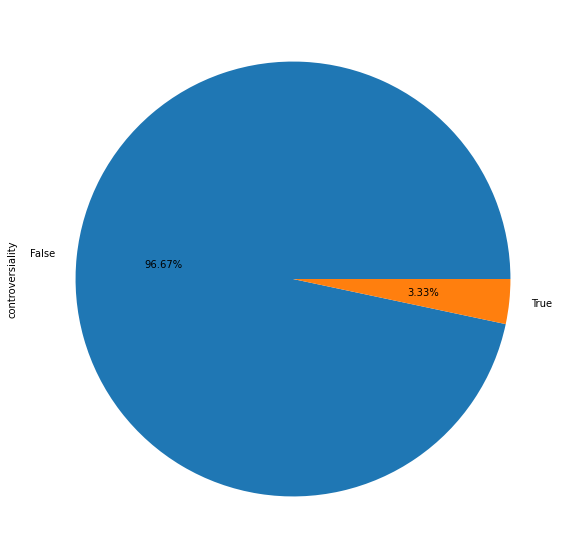

In [23]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [24]:
df['stickied'] = df['stickied'].replace(0,False)

False    207981
Name: stickied, dtype: int64


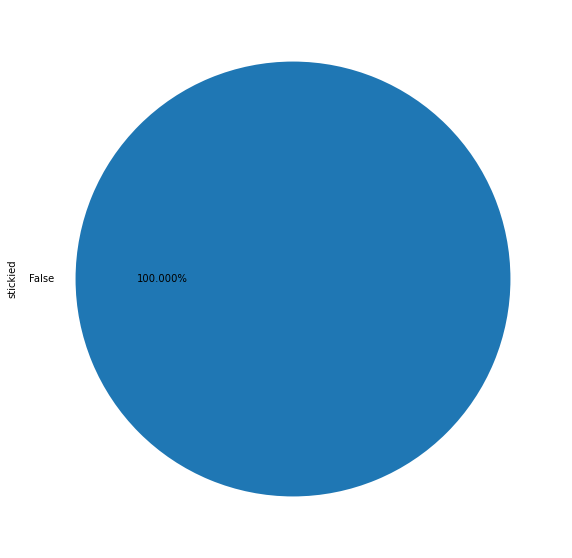

In [25]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# link_id

t3_a1iooy    747
t3_9ve66c    666
t3_9tl85s    640
t3_9tak1m    565
t3_9x3th3    553
            ... 
t3_9o0u8h      1
t3_9yhywc      1
t3_a0o5as      1
t3_9zx4qc      1
t3_9x44db      1
Name: link_id, Length: 13209, dtype: int64


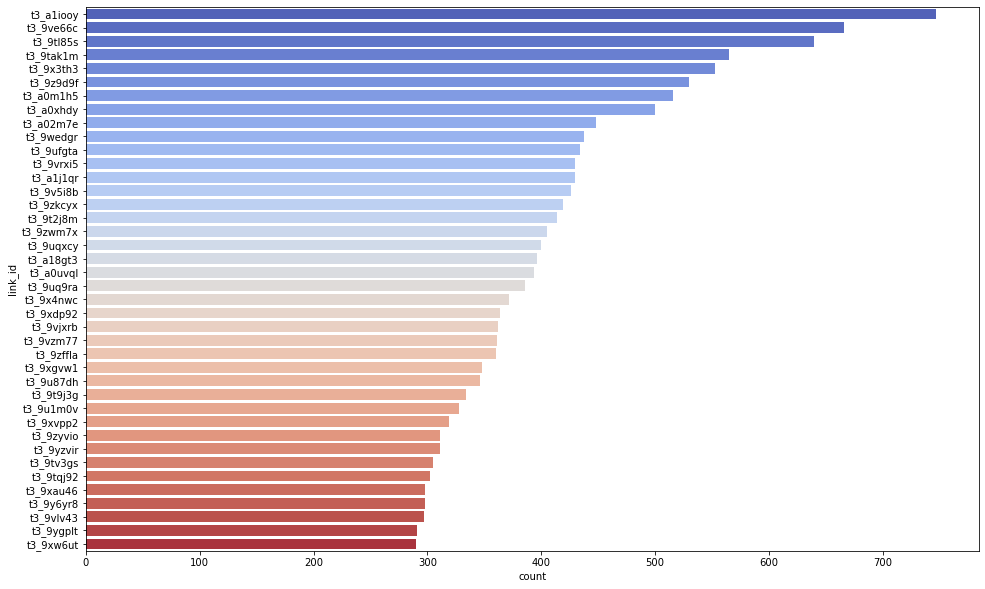

In [26]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [27]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 13209


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

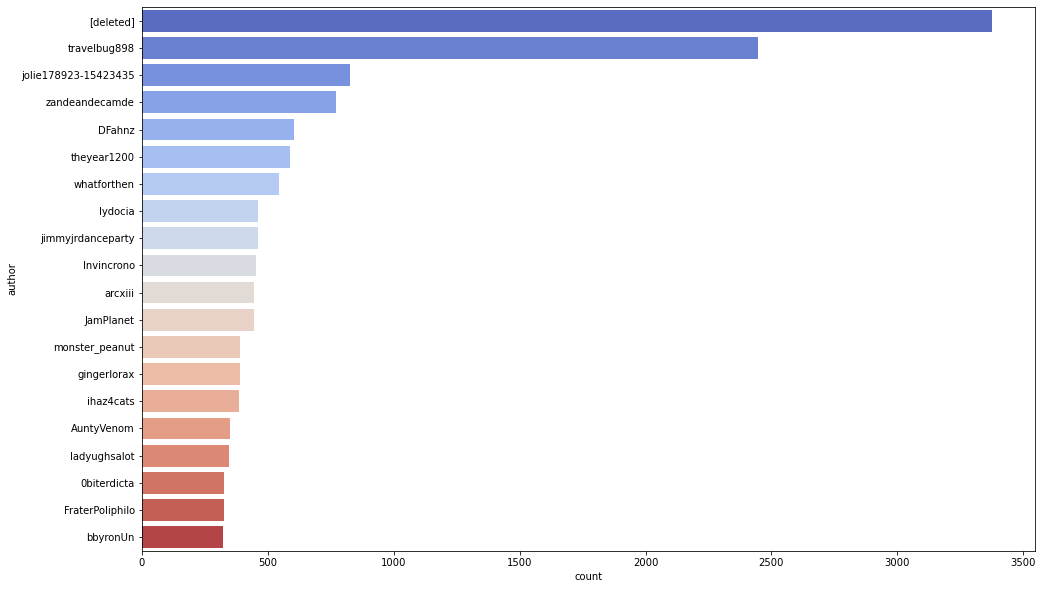

In [28]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

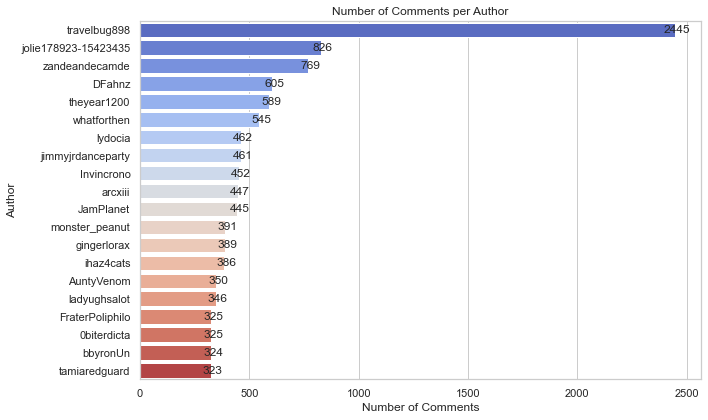

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [30]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 15.75


In [31]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 5.37


# Hours

([<matplotlib.axis.XTick at 0x7fbf08364f40>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

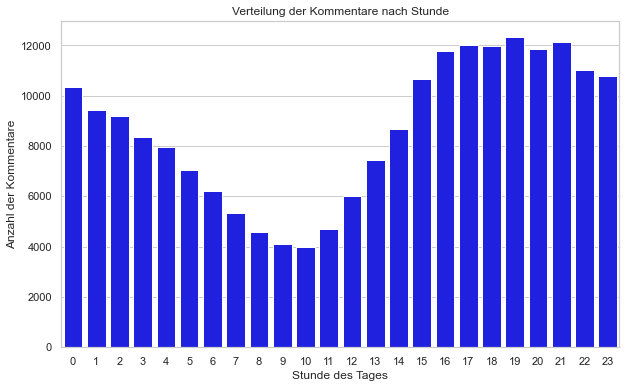

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

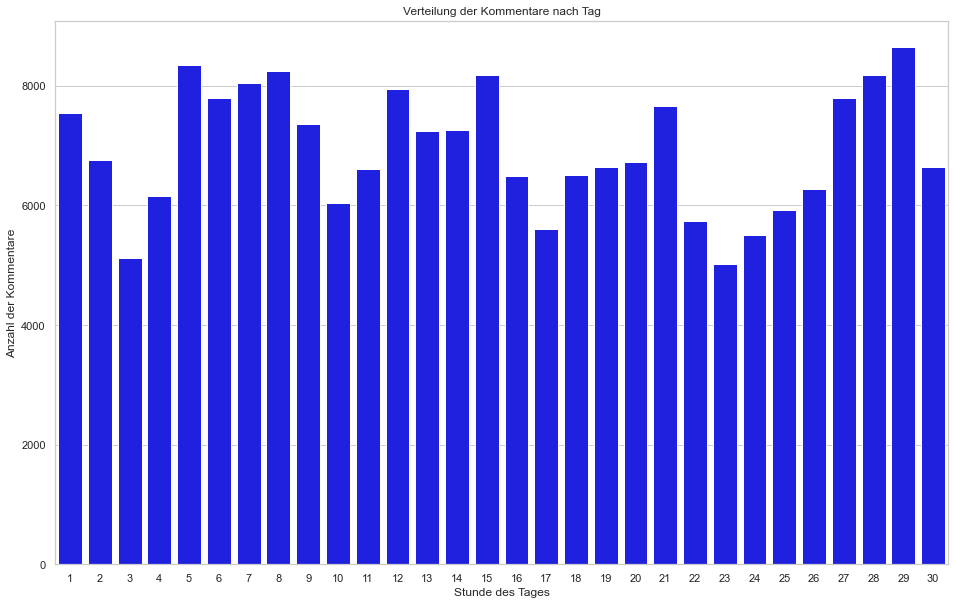

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    207958
1        22
2         1
Name: gilded, dtype: int64


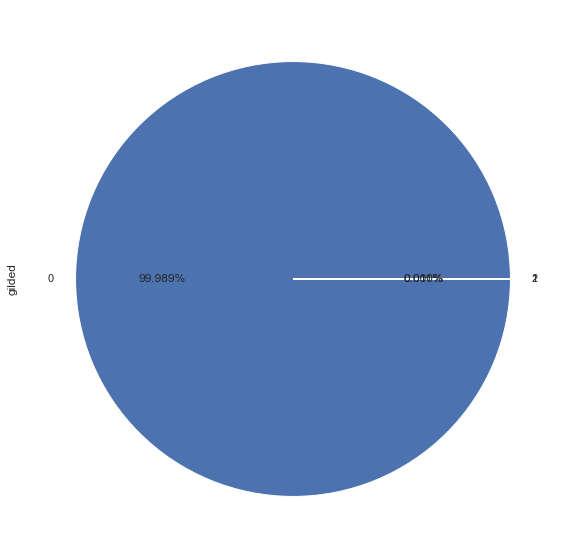

In [34]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguised

In [35]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False        207977
moderator         4
Name: distinguished, dtype: int64


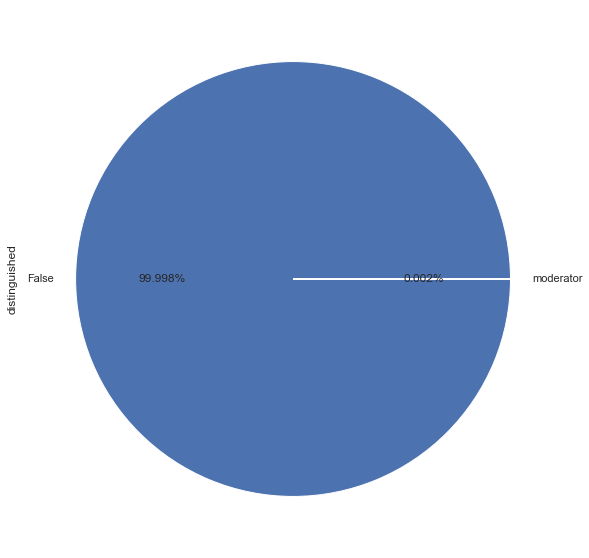

In [36]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [37]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    201622
True       6359
Name: edited, dtype: int64


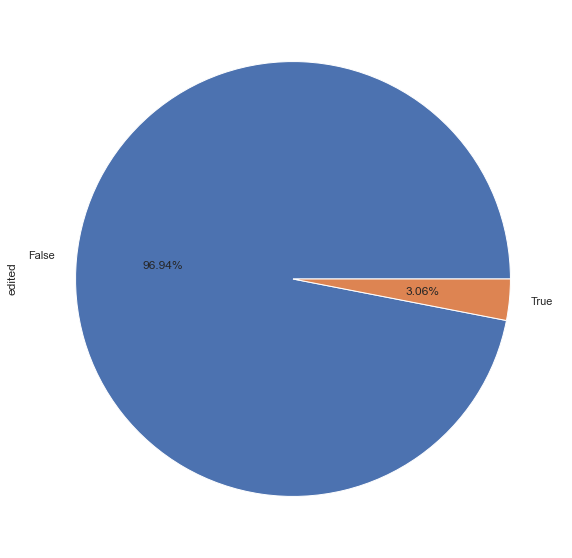

In [38]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [39]:
df["score"].mean()

16.418706516460638

In [40]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
182243,bunnyball88,You can't carpool with someone who wants to go...,False,2018-11-27 18:52:44,False,False,2,eal6kum,t3_a0xhdy,t3_a0xhdy,9879,False,18,27,2018,You can t carpool with someone who wants to go...,26
67262,PlaceForMyPonies,This is definitely a self esteem issue. You ca...,False,2018-11-10 05:55:57,False,False,0,e9enbpg,t3_9vrxi5,t3_9vrxi5,6396,False,5,10,2018,This is definitely a self esteem issue . You c...,154
148645,liarslittlepretty,Honestly they’ve only met you once? I don’t th...,False,2018-11-22 01:23:10,False,False,0,ea7by24,t3_9z9d9f,t3_9z9d9f,6301,False,1,22,2018,Honestly they ve only met you once I don t thi...,78
3853,NDaveT,He's calling you abusive because he doesn't wa...,False,2018-11-01 16:11:14,False,True,0,e8ut77y,t3_9tak1m,t3_9tak1m,5935,False,16,1,2018,He s calling you abusive because he doesn t wa...,53
30851,bootz55,"I’m a certified rehab counselor, and I work wi...",False,2018-11-05 17:49:07,False,False,0,e93uyp6,t3_9ufgta,t3_9ufgta,5904,False,17,5,2018,I m a certified rehab counselor and I work wit...,153
197165,katykatesxo,If you want her to go and she wants to go just...,False,2018-11-29 16:16:10,False,False,0,eaq1zdb,t3_a1iooy,t3_a1iooy,5884,False,16,29,2018,If you want her to go and she wants to go just...,32
11104,avocadoclock,"I know for a fact he buys weed every week, and...",False,2018-11-02 15:50:38,False,False,0,e8x2mv1,t3_9tl85s,t3_9tl85s,5838,False,15,2,2018,I know for a fact he buys weed every week and ...,72
154663,km89,"Totally separate from the point of your post, ...",False,2018-11-23 02:58:11,False,False,0,ea9v60o,t3_9zkcyx,t3_9zkcyx,5740,False,2,23,2018,Totally separate from the point of your post I...,40
106081,clampie,There are consequences for doing the right thi...,False,2018-11-15 18:17:05,False,False,0,e9rf9d7,t3_9xdp92,t3_9xdp92,5160,False,18,15,2018,There are consequences for doing the right thi...,34
174521,anabolic_beard,You are well within your rights to be over thi...,False,2018-11-26 18:39:15,False,False,0,eainn1i,t3_a0m1h5,t3_a0m1h5,4671,False,18,26,2018,You are well within your rights to be over thi...,126


In [41]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
160773,Panama-R3d,"""I sent the text back breaking it off 2 days a...",False,2018-11-24 08:45:23,False,True,0,eacmamr,t3_9zsron,t1_eacm4hq,-217,False,8,24,2018,I sent the text back breaking it off days ago ...,96
149646,davidbzr,Cause I have to stand her complaining now...,False,2018-11-22 05:04:04,False,False,0,ea7pdum,t3_9z9ka5,t1_ea7nrao,-175,False,5,22,2018,Cause I have to stand her complaining now ...,9
72894,overmotion,“and I’m not going to discuss this with you an...,False,2018-11-11 03:55:57,False,False,0,e9gohol,t3_9vzch3,t1_e9gbkwz,-166,False,3,11,2018,and I m not going to discuss this with you any...,15
47059,OneNineRed,"Well, you’re wrong. They say “possession is 9/...",False,2018-11-07 18:07:54,False,False,0,e98mtit,t3_9v0og4,t1_e98k8ma,-161,False,18,7,2018,Well you re wrong . They say possession is ths...,142
160800,Panama-R3d,I acknowledge that my interpretation of the st...,False,2018-11-24 08:54:22,False,False,0,eacmk2j,t3_9zsron,t1_eacmfh1,-153,False,8,24,2018,I acknowledge that my interpretation of the st...,17
197544,travelbug898,"You could've said ""yes"" tho.",False,2018-11-29 17:04:34,False,False,0,eaq628a,t3_a1j1qr,t1_eaq5rof,-136,False,17,29,2018,You could ve said yes tho .,7
71578,Levelfivemage,No? The kid is two. She’s fine. Mom needs help...,False,2018-11-11 00:27:10,False,False,0,e9gbze5,t3_9vyg26,t1_e9g44e7,-131,False,0,11,2018,No The kid is two . She s fine . Mom needs hel...,15
197490,substiccount,Right before he was leaving he asked if I wan...,False,2018-11-29 16:57:15,False,False,0,eaq5ezx,t3_a1j1qr,t3_a1j1qr,-121,False,16,29,2018,Right before he was leaving he asked if I want...,103
18214,iwatchmanycartoons,"Woah no She’s 19, she should not be “limiting ...",False,2018-11-03 17:50:38,False,False,0,e8ziwf8,t3_9tv3gs,t1_e8zata0,-114,False,17,3,2018,Woah no She s she should not be limiting conta...,314
158306,Lenny-Bruce-Lee,This is all from your perspective. I think you...,False,2018-11-23 20:49:05,False,False,0,eabjxf7,t3_9zpoag,t1_eab7pjz,-102,False,20,23,2018,This is all from your perspective . I think yo...,139


# Score vs hours on comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

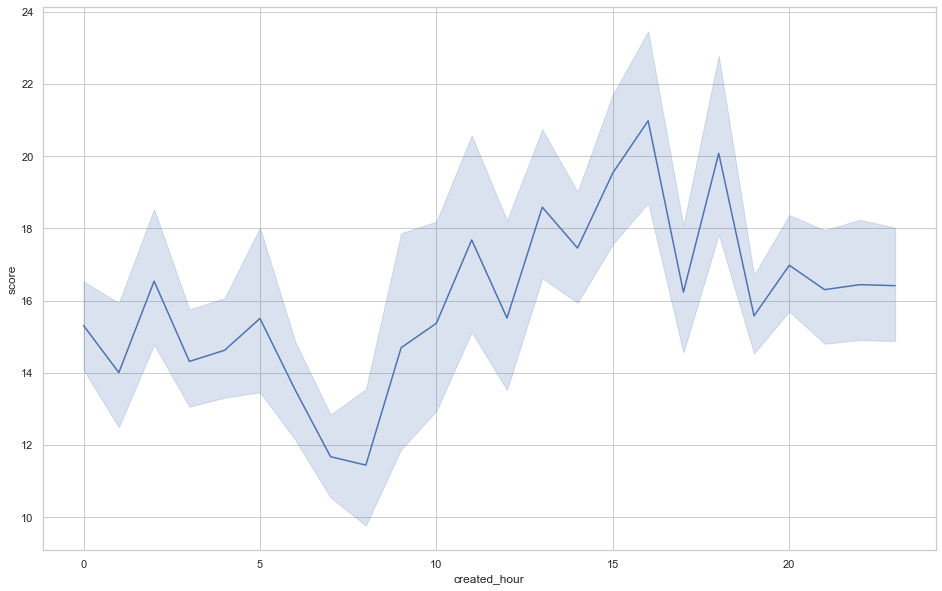

In [42]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score on Comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

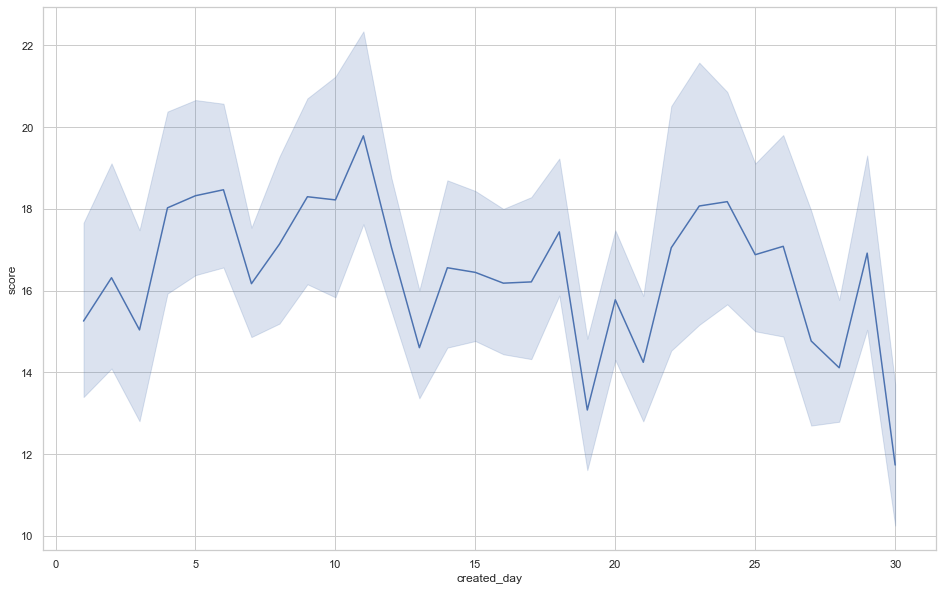

In [43]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which author have the most scores

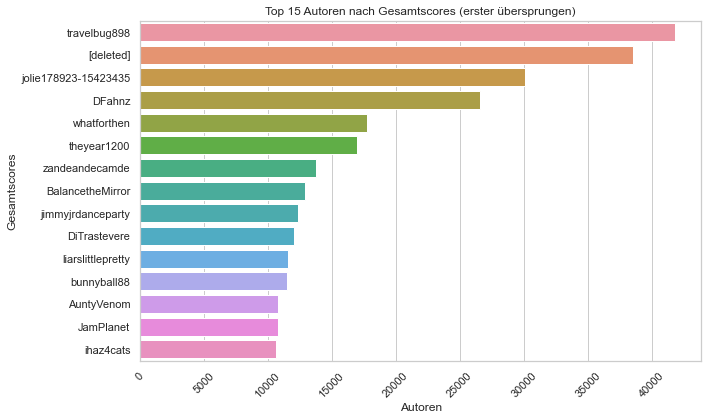

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[0:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

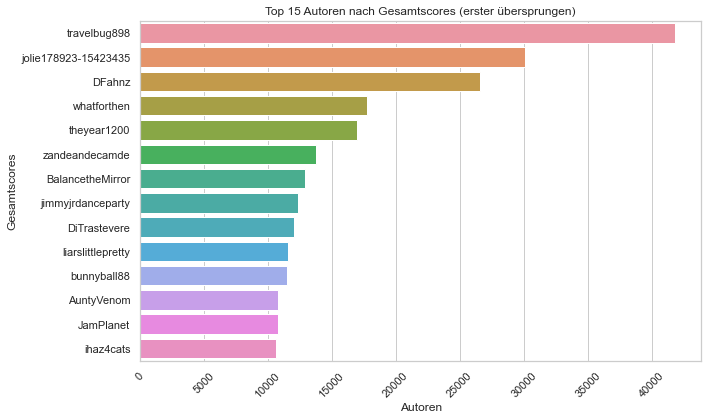

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[0:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Entferne den Autor "[deleted]" aus den Top-Autoren
top_authors = top_authors[top_authors.index != '[deleted]']

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()


In [46]:
df.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,207981.000000,207981.000000,207981.000000,207981.000000,207981.0,207981.000000
mean,0.000115,16.418707,12.669422,15.372909,2018.0,77.070886
std,0.011180,89.468532,7.366130,8.721168,0.0,84.186581
min,0.000000,-217.000000,0.000000,1.000000,2018.0,1.000000
25%,0.000000,1.000000,5.000000,8.000000,2018.0,25.000000
50%,0.000000,3.000000,15.000000,15.000000,2018.0,52.000000
75%,0.000000,9.000000,19.000000,23.000000,2018.0,98.000000
max,2.000000,9879.000000,23.000000,30.000000,2018.0,1910.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207981 entries, 0 to 208009
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            207981 non-null  object
 1   body              207981 non-null  object
 2   controversiality  207981 non-null  bool  
 3   created_utc       207981 non-null  object
 4   distinguished     207981 non-null  object
 5   edited            207981 non-null  bool  
 6   gilded            207981 non-null  int64 
 7   id                207981 non-null  object
 8   link_id           207981 non-null  object
 9   parent_id         207981 non-null  object
 10  score             207981 non-null  int64 
 11  stickied          207981 non-null  bool  
 12  created_hour      207981 non-null  int64 
 13  created_day       207981 non-null  int64 
 14  created_year      207981 non-null  int64 
 15  clean_text        207981 non-null  object
 16  comment_len       207981 non-null  int

# Save cleaned general data

In [48]:
df.to_csv("relationship_18_comments_EDA_clean.csv",index=False,sep=";")

In [1]:
import pandas as pd

In [50]:
test_author=pd.read_csv("relationship_18_comments_EDA_clean.csv",sep=";")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
test_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207981 entries, 0 to 207980
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   author            207981 non-null  object
 1   body              207981 non-null  object
 2   controversiality  207981 non-null  bool  
 3   created_utc       207981 non-null  object
 4   distinguished     207981 non-null  object
 5   edited            207981 non-null  bool  
 6   gilded            207981 non-null  int64 
 7   id                207981 non-null  object
 8   link_id           207981 non-null  object
 9   parent_id         207981 non-null  object
 10  score             207981 non-null  int64 
 11  stickied          207981 non-null  bool  
 12  created_hour      207981 non-null  int64 
 13  created_day       207981 non-null  int64 
 14  created_year      207981 non-null  int64 
 15  clean_text        207981 non-null  object
 16  comment_len       207981 non-null  int

In [53]:
test_author.describe()

,gilded,score,created_hour,created_day,created_year,comment_len
count,207981.000000,207981.000000,207981.000000,207981.000000,207981.0,207981.000000
mean,0.000115,16.418707,12.669422,15.372909,2018.0,77.070886
std,0.011180,89.468532,7.366130,8.721168,0.0,84.186581
min,0.000000,-217.000000,0.000000,1.000000,2018.0,1.000000
25%,0.000000,1.000000,5.000000,8.000000,2018.0,25.000000
50%,0.000000,3.000000,15.000000,15.000000,2018.0,52.000000
75%,0.000000,9.000000,19.000000,23.000000,2018.0,98.000000
max,2.000000,9879.000000,23.000000,30.000000,2018.0,1910.000000


In [52]:
print("Anzahl der Authoren==",test_author['author'].nunique())

Anzahl der Authoren== 38730
